In [2]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**8 + c**2*b
diff(f, a)


8*a**7 + 5*b - cos(c)

In [13]:
from sympy import diff, sin, Symbol
x, y = symbols('x y', real=True)
f = y*sin(x) + sin(y)
diff(f, y)

sin(x) + cos(y)

In [54]:
from sympy import diff, sin, Symbol
x, y = symbols('x y', real=True)
f = (2.1 - x - y)**2 + (2.9 - x - 3*y)**2 + (4.1 - x - 5*y)**2
diff(f, y)

In [55]:
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(6*x +18*y -18.2,0)
eq2 = Eq(18*x-70*y-62.6, 0)
 
solve([eq1, eq2], [x, y])

In [30]:
import sympy
from sympy import solveset, Eq
from sympy import diff, sin, exp, log, Symbol
x, y = symbols('x, y')
expr = (x**3 + y**3 - 3*x*y) 
expr.diff(x)
expr.diff(y)

-3*x + 3*y**2

In [32]:
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(3*x**2 - 3*y,0)
eq2 = Eq(3*y**2 - 3*x, 0)
 
solve([eq1, eq2], [x, y])

[(0, 0),
 (1, 1),
 ((-1/2 - sqrt(3)*I/2)**2, -1/2 - sqrt(3)*I/2),
 ((-1/2 + sqrt(3)*I/2)**2, -1/2 + sqrt(3)*I/2)]

In [27]:
from sympy import *
x, y = symbols('x, y')
expr = (x**3 - 2*x*y - y**6) 
expr.diff(y)

-2*x - 6*y**5

# ОПТИМИЗАЦИЯ

In [33]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

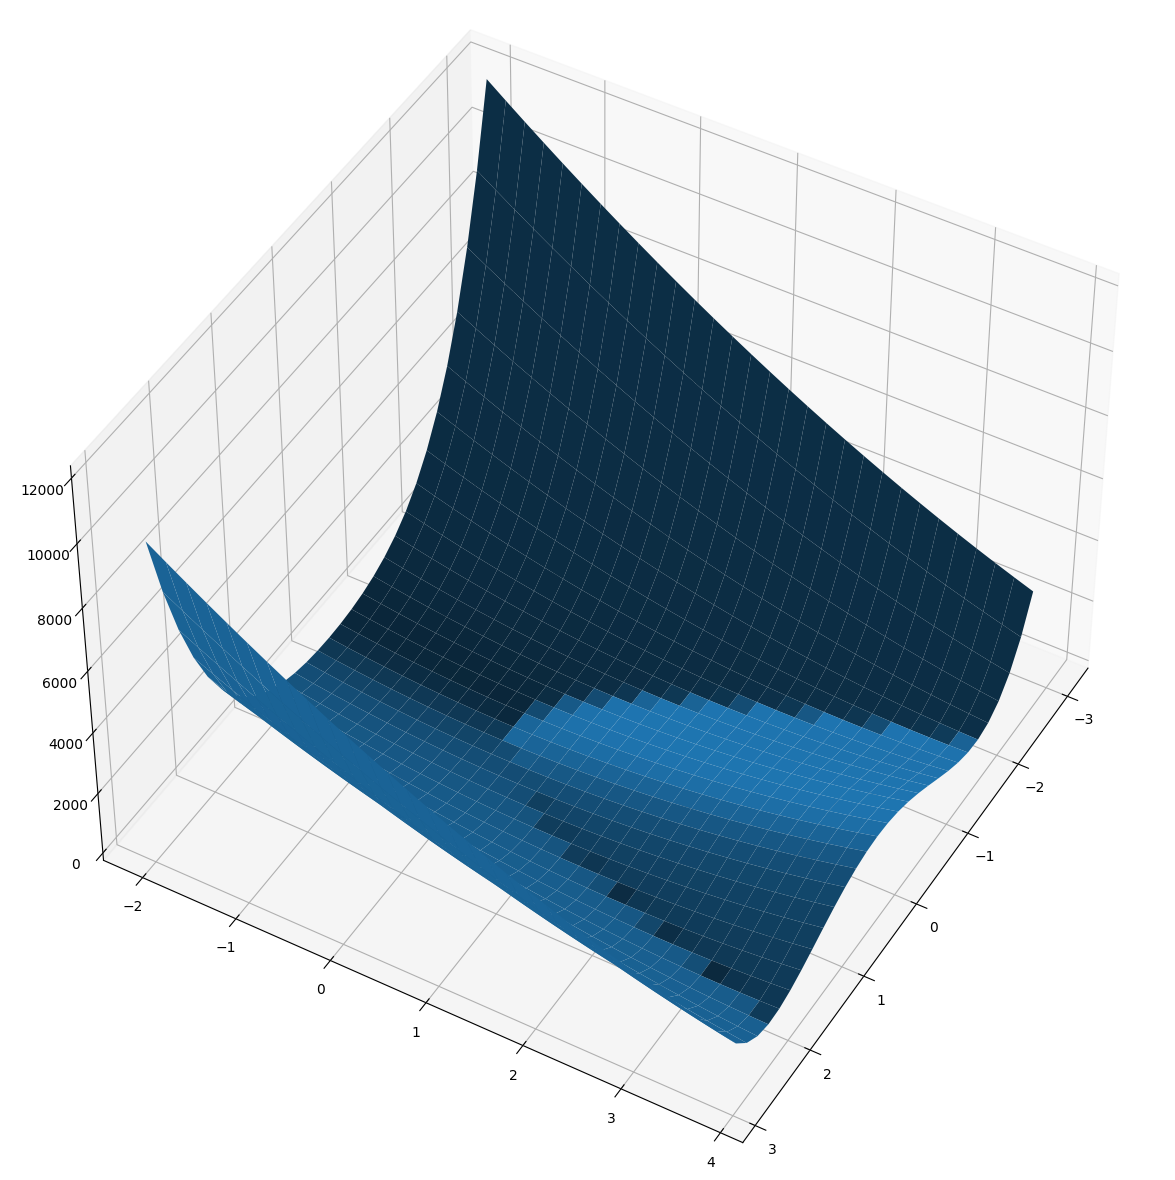

In [34]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

In [35]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


In [36]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


In [40]:
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = least_squares(func_rosen, x1)

print(result_point.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076162]


In [41]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [42]:
# Импортируем все необходимые функции из библиотеки SymPy
from sympy import init_printing, solve, symbols

# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]


# Градиент

Итак, перейдём к примеру вычислений. Для работы с градиентом импортируем хорошо известную нам библиотеку NumPy:

Зададим массив, для которого хотим найти градиент, и вычислим его:

In [43]:
import numpy as np
f = np.array([3, 7, 14, 23, 36, 47], dtype=float)
np.gradient(f)

array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

Если специально не определять аргумент varargs, то его значение равно 1, так что на границах вектора мы получаем обычную разность для соседних элементов массива:

In [44]:
print(f[1] - f[0], f[-1] - f[-2])

4.0 11.0


А вот внутри вектора для каждого элемента мы считаем разность его соседних значений, но уже поделённую на 2:

In [45]:
(f[2] - f[0])/2 # 5.5
(f[3] - f[1])/2 # 8.0
(f[4] - f[2])/2 # 11.0
(f[5] - f[3])/2 # 12.0

Шаг можно варьировать. При его изменении вычисления реализуются так же, но деление происходит на величину обычного шага у края и удвоенную величину шага для элементов внутри вектора:

In [47]:
np.gradient(f, 2)

# array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))

2.75
4.0
5.5
6.0


In [51]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
np.gradient(f, 7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

# Градиентный спуск

Мы разобрались с тем, как работает градиентный спуск в теории. Теперь давайте рассмотрим визуализацию данного процесса. Определим простейшую выпуклую функцию. В ней нет ничего особенного, но она очень удобна в визуальном плане:

In [56]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [57]:
# Определим функцию, которая вычислит градиент:

def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [58]:
# Также запрограммируем простейший вариант для градиентного спуска:

def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [59]:
# Напишем функцию, которая будет строить график:

def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

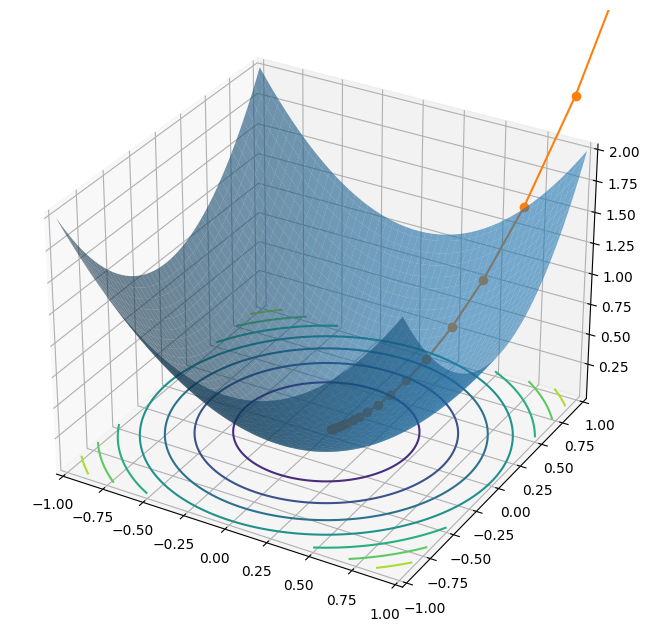

In [60]:
# Визуализируем и получим следующее движение градиентного спуска к минимуму:

trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)